In [1]:
import pickle
import pandas as pd

cat_py = pickle.load(open("OUTPUTS/Unclustered_1deg2.p", "rb"))

renorm = 2.

cat_py_ori = pickle.load(open("OUTPUTS/pySIDES_from_original.p", "rb"))

In [2]:
#from scipy.io import readsav

cat_idl = pd.read_csv('SIDES_Bethermin2017.csv')

In [3]:
cat_py.columns

Index(['redshift', 'Mstar', 'qflag', 'SFR', 'issb', 'mu', 'Dlum', 'Umean',
       'LIR', 'S24', 'S70', 'S100', 'S160', 'S250', 'S350', 'S500', 'S1200',
       'S2000', 'LFIR', 'SMIPS24', 'SPACS70', 'SPACS100', 'SPACS160',
       'SSPIRE250', 'SSPIRE350', 'SSPIRE500', 'SNIKA1200', 'SNIKA2000',
       'LprimCO10', 'ICO10', 'ICO21', 'ICO32', 'ICO43', 'ICO54', 'ICO65',
       'ICO76', 'ICO87', 'LCII_Lagache', 'ICII_Lagache', 'LCII_de_Looze',
       'ICII_de_Looze', 'ICI10', 'ICI21'],
      dtype='object')

In [4]:
cat_idl

redshift        ra       dec         Mhalo         Mstar  qflag  \
0        0.027082  1.386314  0.578664  9.755162e+11  1.166001e+10      1   
1        0.029516  0.454959  1.145274  9.693363e+11  2.612670e+10      1   
2        0.028948  0.653517  1.053531  3.458112e+11  4.891516e+09      0   
3        0.027158  0.931048  0.651234  3.478761e+11  1.876074e+09      0   
4        0.028611  0.787421  0.940826  3.362242e+11  1.672992e+09      0   
...           ...       ...       ...           ...           ...    ...   
5584993  9.951501  1.372015  0.020294  8.731121e+10  1.499852e+08      1   
5584994  9.987066  1.009508  0.299231  1.691445e+10  1.022215e+07      1   
5584995  9.979968  1.084438  0.680461  3.428466e+10  3.201675e+07      1   
5584996  9.960913  1.167128  1.148331  5.714159e+10  2.027734e+07      1   
5584997  9.963245  1.347938  1.339710  4.616962e+10  1.282686e+07      1   

              SFR        mu  issb      Umean  ...  SCCAT450  SCCAT750  \
0        0.000000  0.990643     0   4.034063  ...  0.000000  0.000000   
1        0.000000  1.000904     0   5.085710  ...  0.000000  0.000000   
2        1.543751  1.009224     0   8.057672  ...  0.051566  0.010987   
3        0.385166  0.999897     0   5.078807  ...  0.020753  0.004537   
4        0.234264  0.992068     0   6.399194  ...  0.009172  0.001976   
...           ...       ...   ...        ...  ...       ...       ...   
5584993  0.000000  0.834836     0  39.716415  ...  0.000000  0.000000   
5584994  0.000000  0.956522     0  25.059364  ...  0.000000  0.000000   
5584995  0.000000  0.875079     0  50.000008  ...  0.000000  0.000000   
5584996  0.000000  0.956788     0  19.905361  ...  0.000000  0.000000   
5584997  0.000000  0.674742     0  25.059364  ...  0.000000  0.000000   

         SCCAT850  SCCAT1100  SCCAT1300  SCCAT2000  SCCAT3300  SSPIRE250ext  \
0        0.000000   0.000000   0.000000   0.000000   0.000000      0.000000   
1        0.000000   0.000000   0.000000   0.000000   0.000000      0.000000   
2        0.005997   0.002999   0.001813   0.000570   0.000311      0.248348   
3        0.002485   0.001237   0.000740   0.000212   0.000098      0.093634   
4        0.001080   0.000539   0.000324   0.000098   0.000050      0.042881   
...           ...        ...        ...        ...        ...           ...   
5584993  0.000000   0.000000   0.000000   0.000000   0.000000      0.000000   
5584994  0.000000   0.000000   0.000000   0.000000   0.000000      0.000000   
5584995  0.000000   0.000000   0.000000   0.000000   0.000000      0.000000   
5584996  0.000000   0.000000   0.000000   0.000000   0.000000      0.000000   
5584997  0.000000   0.000000   0.000000   0.000000   0.000000      0.000000   

         SSPIRE350ext  SSPIRE500ext  
0            0.000000      0.000000  
1            0.000000      0.000000  
2            0.100362      0.034429  
3            0.039563      0.013977  
4            0.017684      0.006147  
...               ...           ...  
5584993      0.000000      0.000000  
5584994      0.000000      0.000000  
5584995      0.000000      0.000000  
5584996      0.000000      0.000000  
5584997      0.000000      0.000000  

[5584998 rows x 31 columns]

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def compare_idl_py(cat_idl, idl_name, cat_py, name_py, cat_py_ori, name_py_ori, log = False, renorm = 1.):
    
    Nbins = 100
    
    if log:
        X_idl = np.log10(cat_idl[idl_name])
        X_py = np.log10(cat_py[name_py]) 
        X_py_ori = np.log10(cat_py_ori[name_py_ori])
        Xname = 'log('+name_py+')'
    else:
        X_idl = cat_idl[idl_name]
        X_py = cat_py[name_py]
        X_py_ori = cat_py[name_py_ori]
        Xname = name_py

    for k in range(0,9):
        
        #unclustered catalog
    
        sel_py = np.where( (cat_py["redshift"] > k) &
                          (cat_py["redshift"] < k+1 ) & np.isfinite(X_py))
        
        Xz_py = X_py[sel_py[0]]
        
        selrange = [np.min(Xz_py), np.max(Xz_py)]
        
        weights = renorm + np.zeros(len(Xz_py))
    
        SIDES_py = plt.hist(Xz_py, bins = Nbins, histtype = 'step', range = selrange, label = 'Python (unclustered)', weights = weights)
    
        #from original Mstar
    
        sel_py_ori = np.where( (cat_py_ori["redshift"] > k) &
                          (cat_py_ori["redshift"] < k+1 ) & np.isfinite(X_py_ori))
        
        Xz_py_ori = X_py_ori[sel_py_ori[0]]
        
        weights = renorm + np.zeros(len(Xz_py))
    
        SIDES_py_ori = plt.hist(Xz_py_ori, bins = Nbins, histtype = 'step', range = selrange, label = 'Python (from original Mstar)')
    
        #IDL version
    
        sel_idl = np.where( (cat_idl["redshift"] > k) &
                              (cat_idl["redshift"] < k+1 ) & np.isfinite(X_idl))
        
        Xz_idl = X_idl[sel_idl[0]]

        plt.hist(Xz_idl, bins = Nbins, histtype = 'step', range = selrange, label = 'IDL')
    
        plt.title('{} < z < {}'.format(k, k+1))
        plt.yscale('log')
        
        plt.xlabel(Xname)
        plt.ylabel('#')
        
        plt.legend()
        
        #plt.legend([pySIDES, IDL_SIDES], ['PySIDES','IDL'])

        plt.show()

/Users/mbethermin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


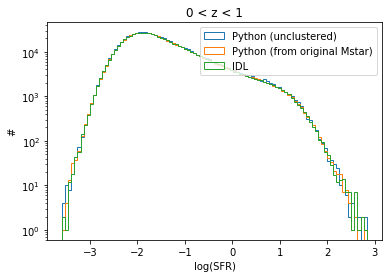

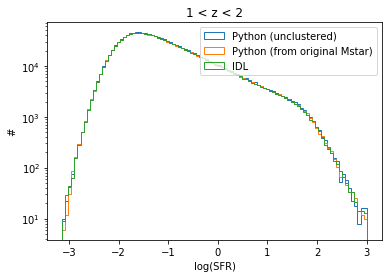

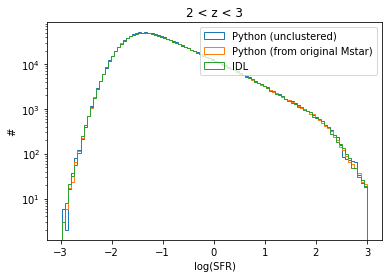

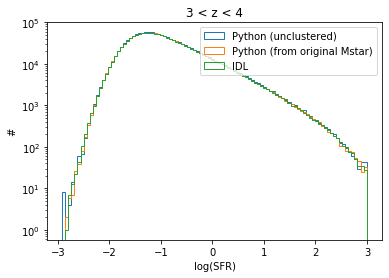

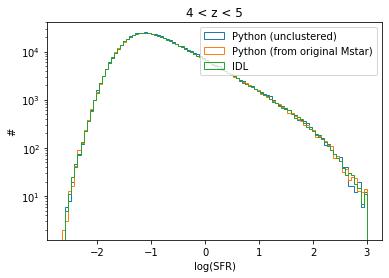

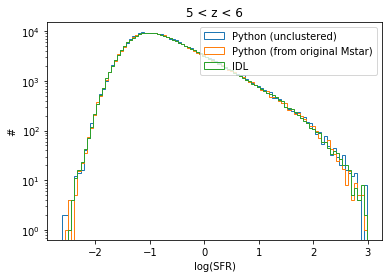

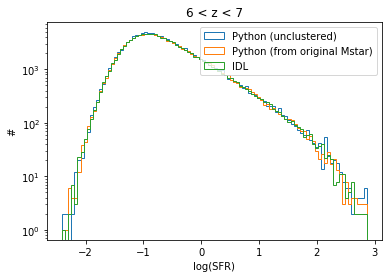

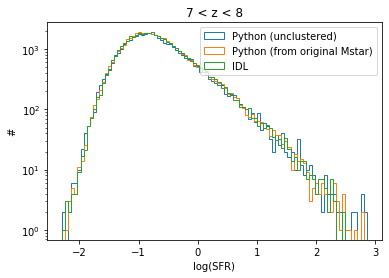

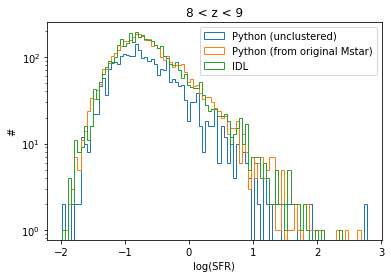

In [6]:
compare_idl_py(cat_idl, "SFR", cat_py, "SFR", cat_py_ori, "SFR", log = True, renorm = renorm)

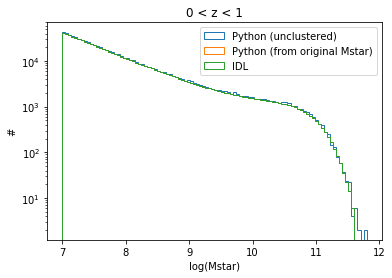

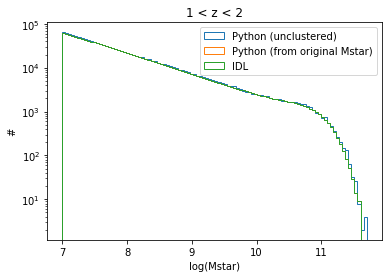

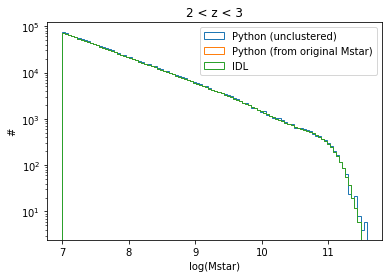

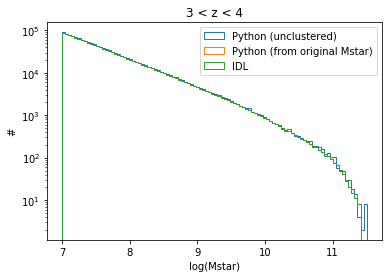

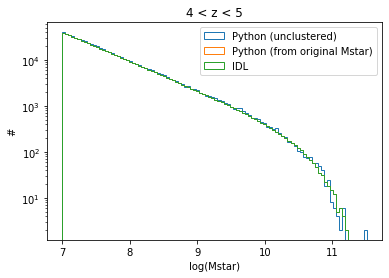

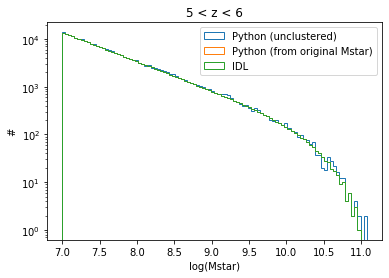

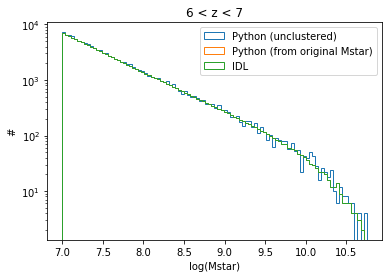

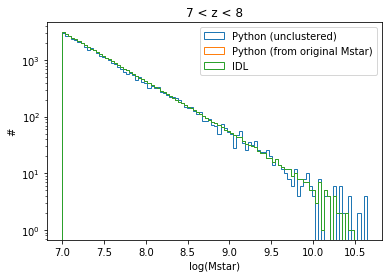

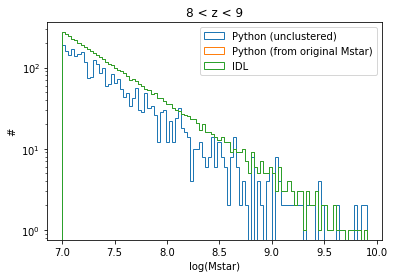

In [7]:
#Note the IDL and original Mstar list are exactly the same. So, we see only one!
compare_idl_py(cat_idl, "Mstar", cat_py, "Mstar", cat_py_ori, "Mstar", log  = True, renorm = renorm)

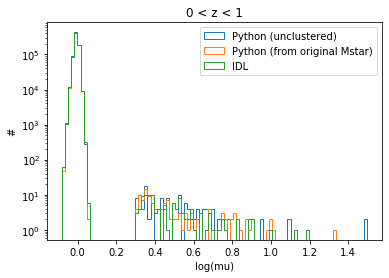

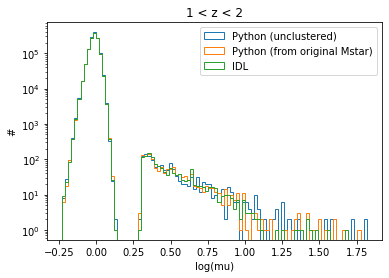

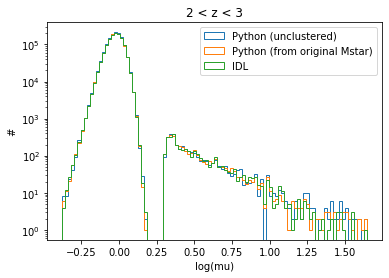

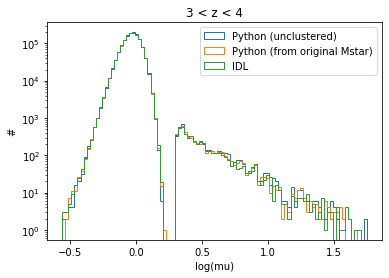

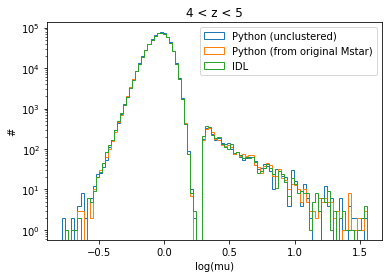

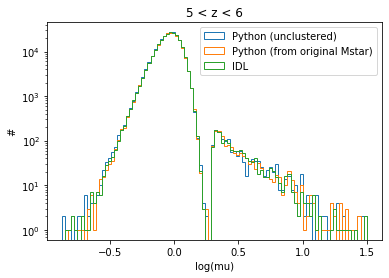

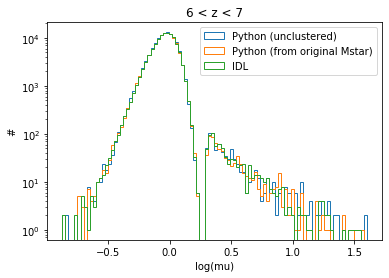

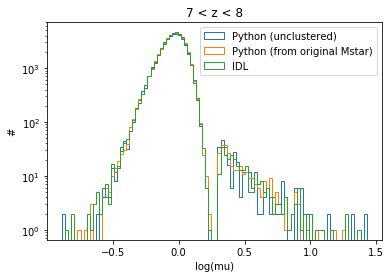

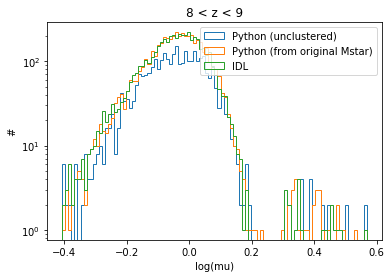

In [8]:
#normalization not the same because not the same Scut
compare_idl_py(cat_idl, "mu", cat_py, "mu", cat_py_ori, "mu", log  = True, renorm = renorm)

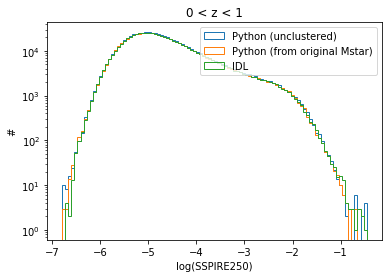

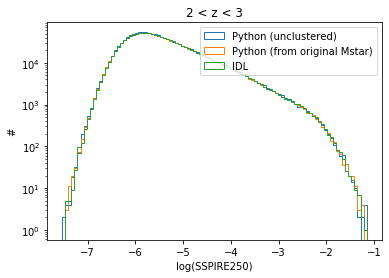

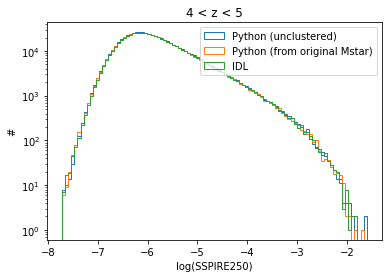

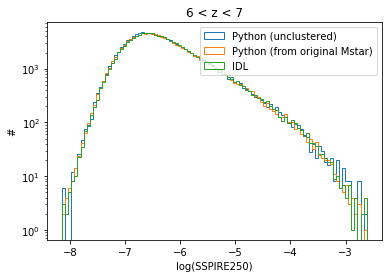

In [9]:
compare_idl_py(cat_idl, "SSPIRE250", cat_py, "SSPIRE250", cat_py_ori, "SSPIRE250", log  = True, renorm = renorm)

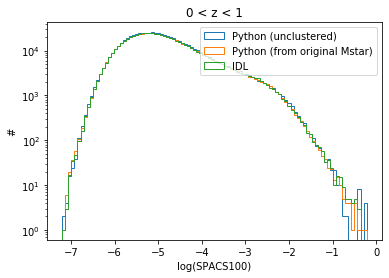

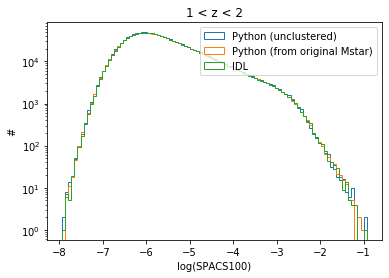

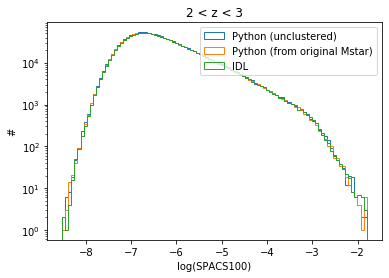

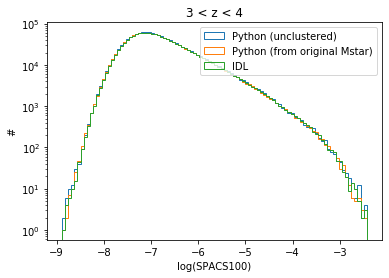

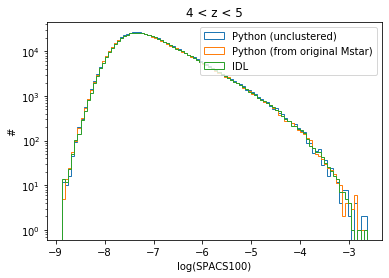

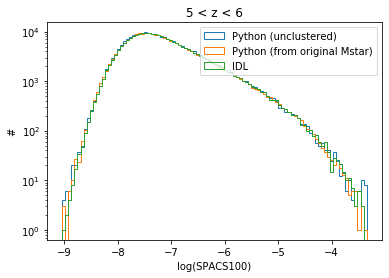

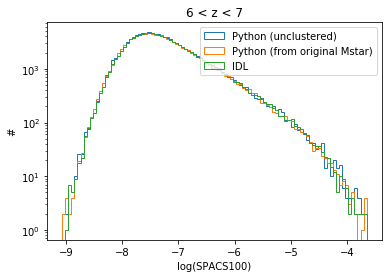

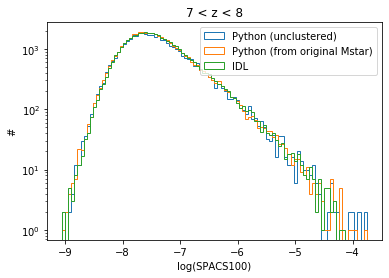

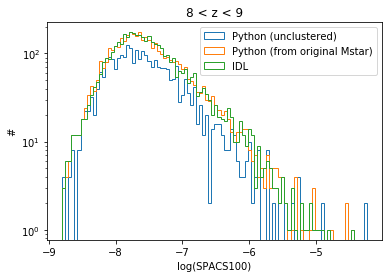

In [10]:
compare_idl_py(cat_idl, "SPACS100", cat_py, "SPACS100", cat_py_ori, "SPACS100", log  = True, renorm = renorm)

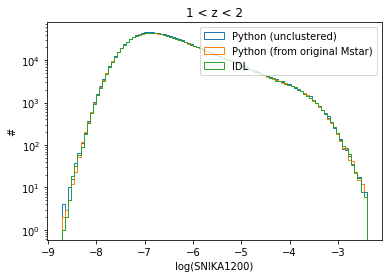

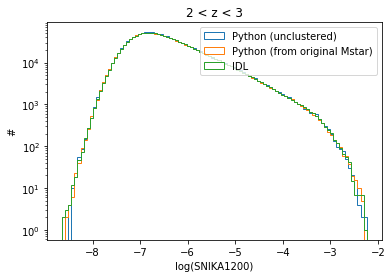

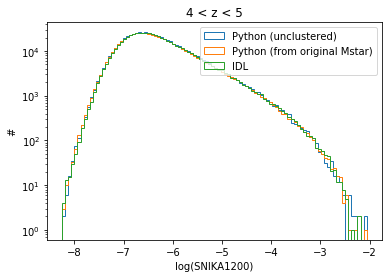

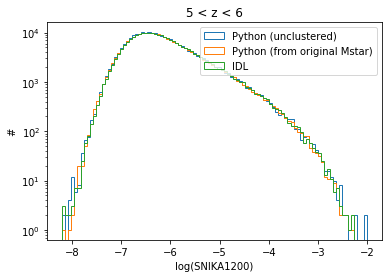

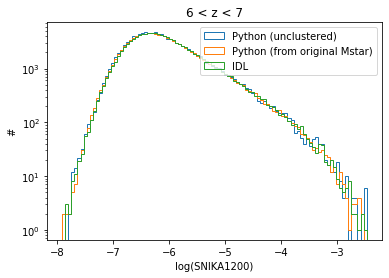

In [11]:
compare_idl_py(cat_idl, "SNIKA1200", cat_py, "SNIKA1200", cat_py_ori, "SNIKA1200", log  = True, renorm = renorm)

/Users/mbethermin/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/mbethermin/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/mbethermin/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


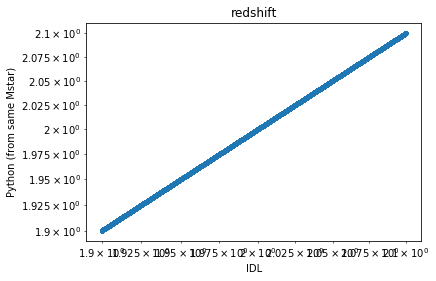

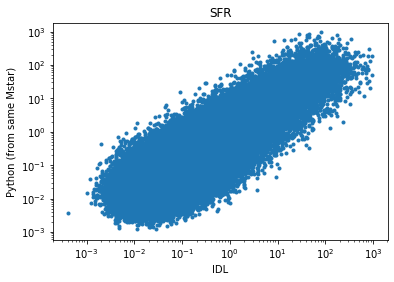

In [12]:
todo = ['redshift', 'SFR']

sel = np.where(np.abs(cat_idl['redshift']-2) < 0.1)[0]

for col in todo:

    plt.plot(cat_idl[col][sel], cat_py_ori[col][sel], '.')
    
    plt.title(col)
    plt.xlabel('IDL')
    plt.ylabel('Python (from same Mstar)')
    plt.xscale('log')
    plt.yscale('log')
    plt.show()

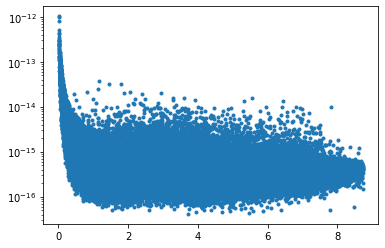

In [13]:
plt.plot(cat_py['redshift'], cat_py['SNIKA1200'] / cat_py['LIR'], '.')

plt.yscale('log')

plt.show()